In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('/Users/oguzmetekaya/Machine Learning/rice.xlsx')

In [7]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [8]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [9]:
df['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

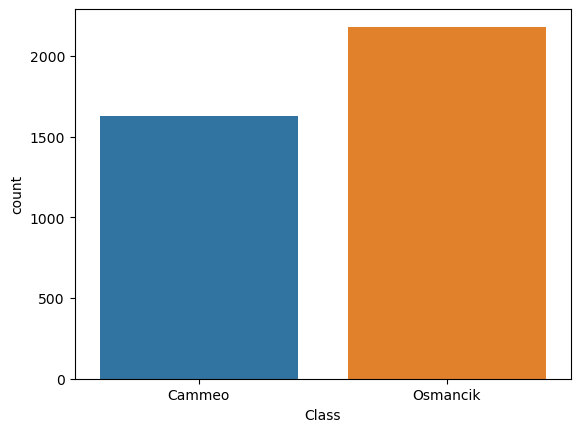

In [10]:
sns.countplot(x='Class', data=df)

In [12]:
df['Class'].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

<Axes: xlabel='Area', ylabel='Perimeter'>

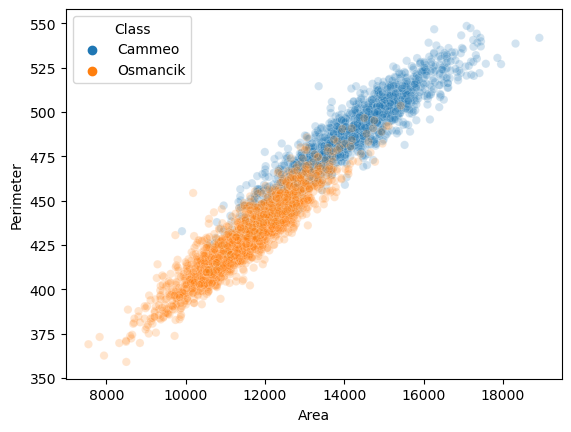

In [19]:
sns.scatterplot(x='Area', y='Perimeter', data=df, alpha=0.2, hue='Class')

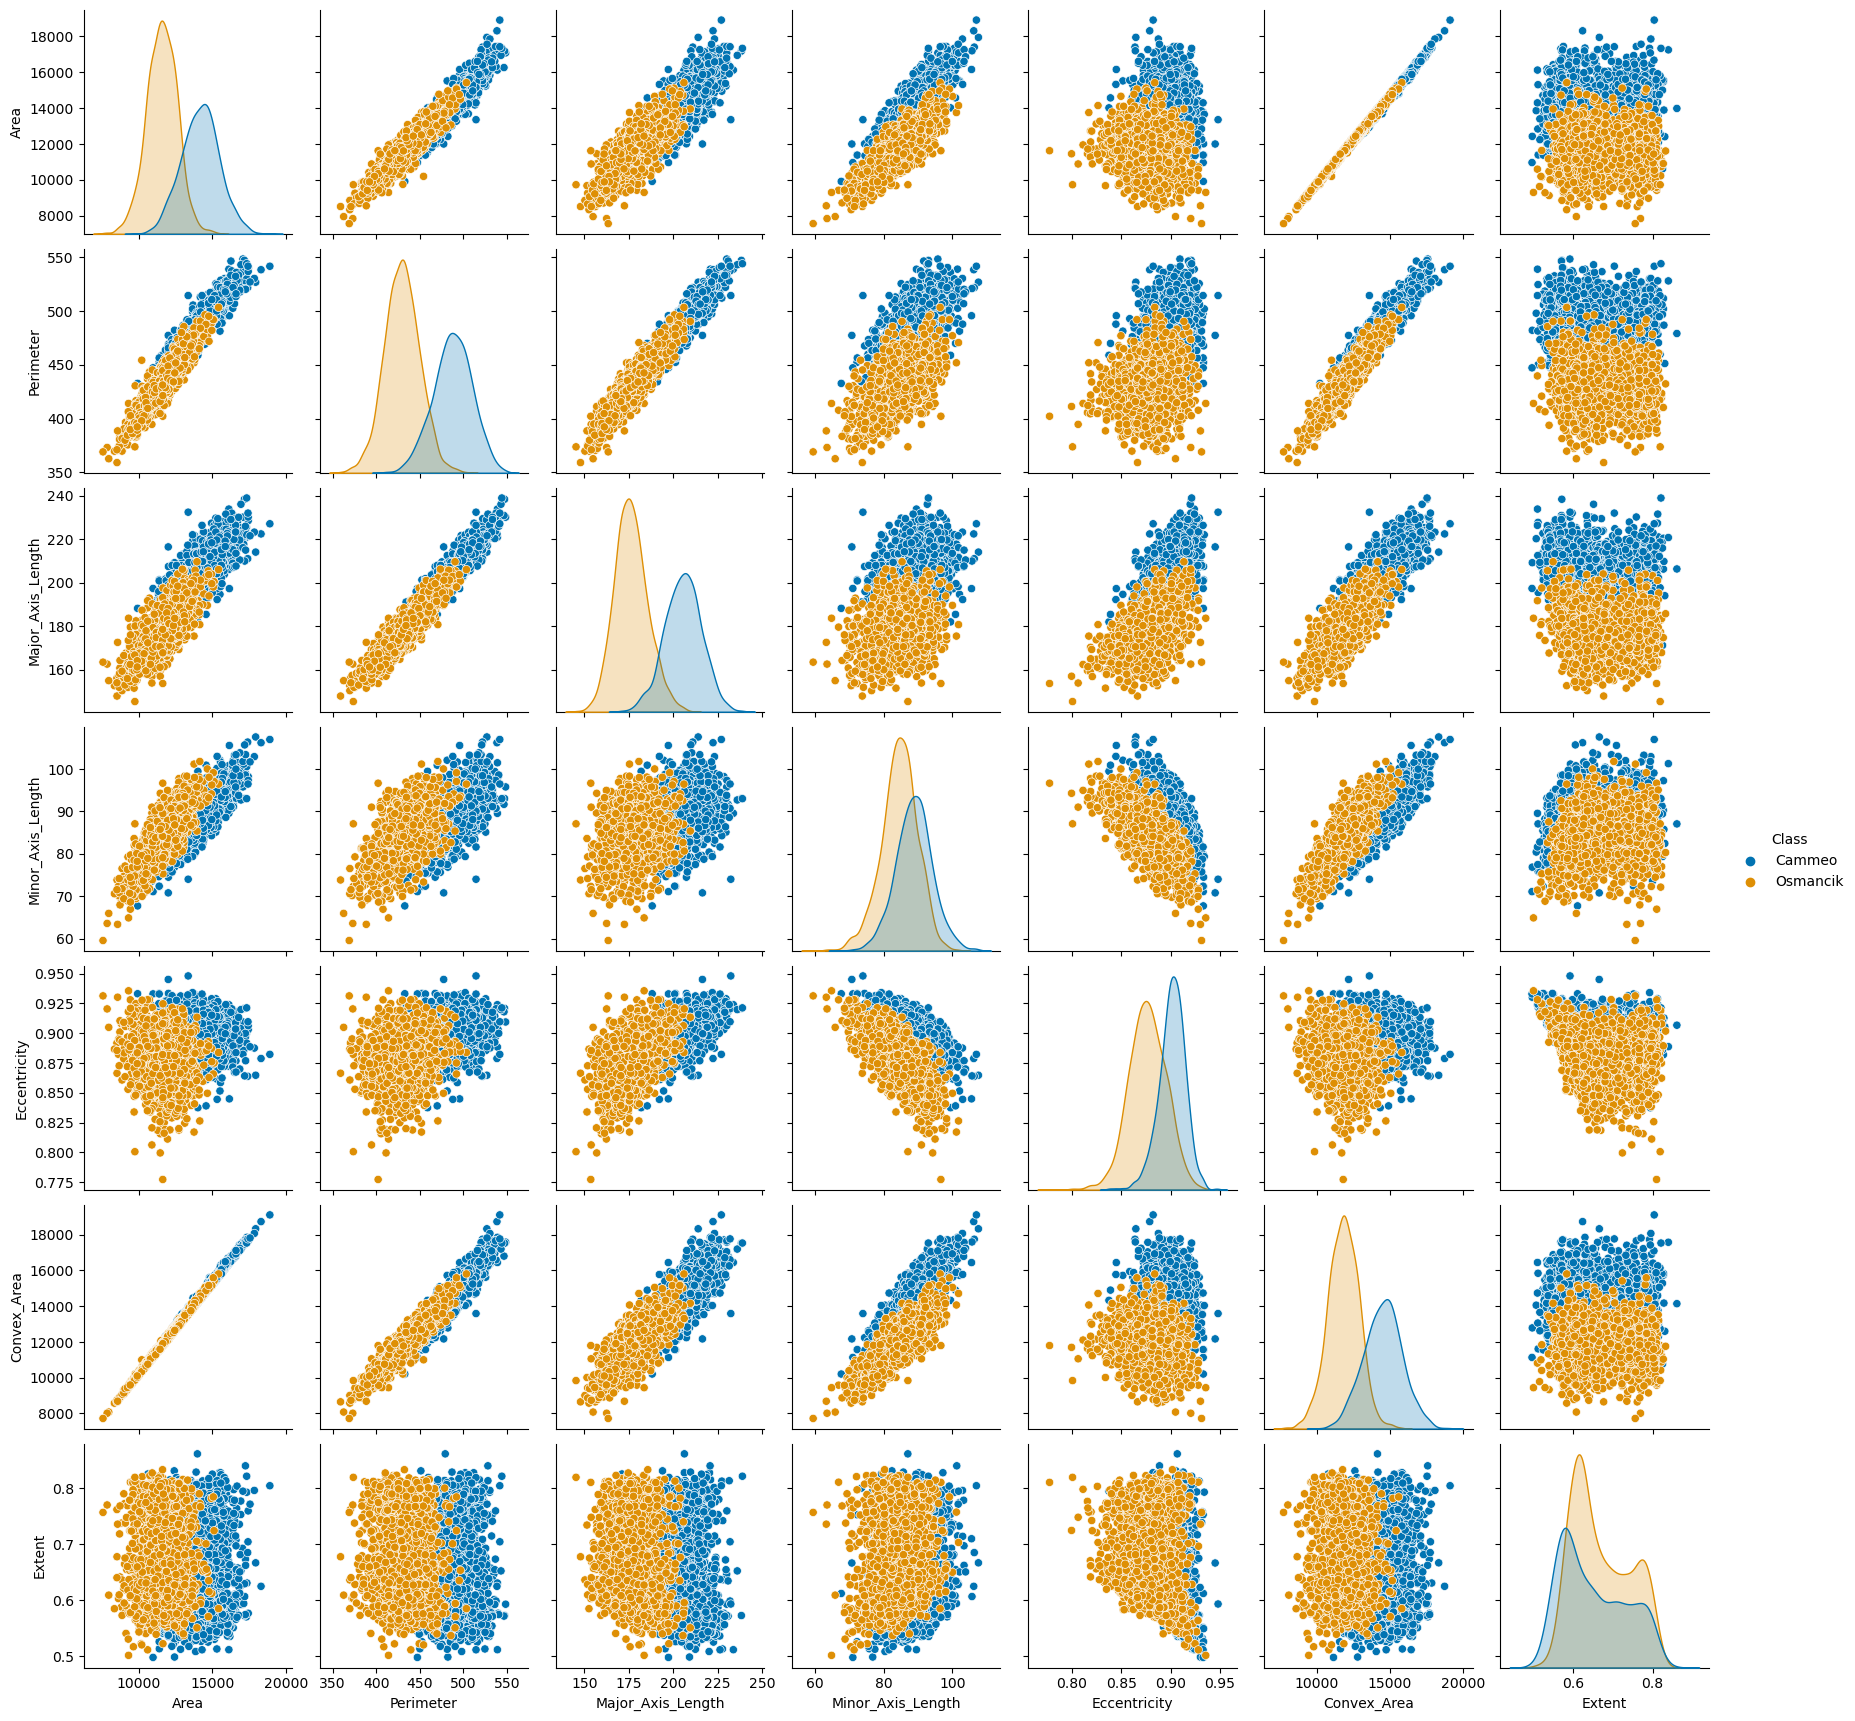

In [24]:
sns.pairplot(df, hue='Class', palette='colorblind')

In [25]:
df.corr()

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1781651064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

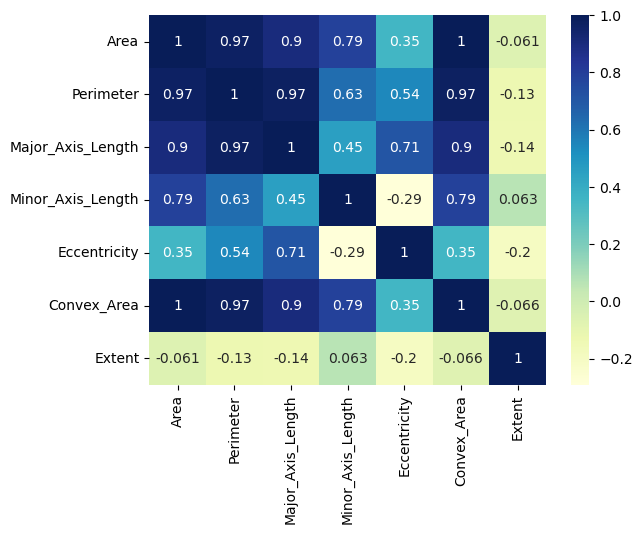

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Train Test Split

In [31]:
X= df.drop('Class', axis=1)
y= pd.get_dummies(df['Class'], drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

In [35]:
len(X_train)

3429

In [36]:
len(X_test)

381

## Hiper Orman

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [40]:
n_est = [9,64,128,200]
max_feat = [1,2,3,4]
bootstrap_sec = [True, False] 
oob = [True, False]

In [45]:
parameters = {
    'n_estimators' : n_est,
    'max_features' : max_feat,
    'bootstrap'    : bootstrap_sec,
    'oob_score'    : oob
}

In [46]:
random_forest  = RandomForestClassifier()

In [47]:
grid = GridSearchCV(random_forest, parameters)

In [48]:
grid.fit(X_train, y_train)

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some in

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/pyth

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [49]:
grid.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=200)

In [55]:
grid.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 200, 'oob_score': False}

In [51]:
pilav_pred = grid.predict(X_test)

## Değerlendirme

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

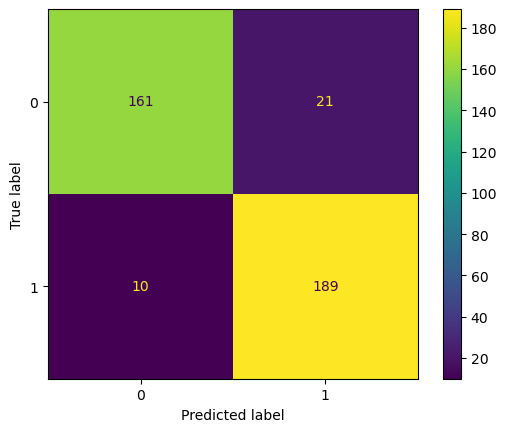

In [53]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [54]:
print(classification_report(y_test, pilav_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       182
           1       0.90      0.95      0.92       199

    accuracy                           0.92       381
   macro avg       0.92      0.92      0.92       381
weighted avg       0.92      0.92      0.92       381



## Estimator Sayısı Belirleme

In [62]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

hata_payi = []
yanlis_secim = []

for n in range(1, 130):
    rand_forest_class = RandomForestClassifier(n_estimators=n,
                                               bootstrap=True,
                                               oob_score=False,
                                               max_features=1)
    rand_forest_class.fit(X_train, y_train)
    pirinc_pred = rand_forest_class.predict(X_test)
    error = 1 - accuracy_score(pirinc_pred, y_test)

    sample = y_test.to_numpy()
    sample = sample.reshape(1, -1)[0]

    n_missed = np.sum(pirinc_pred != sample)
    hata_payi.append(error)
    yanlis_secim.append(n_missed)


/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_2532/1069460687.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

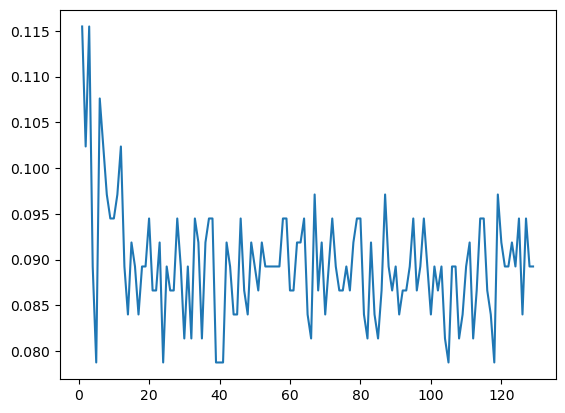

In [63]:
plt.plot(range(1,130),hata_payi)

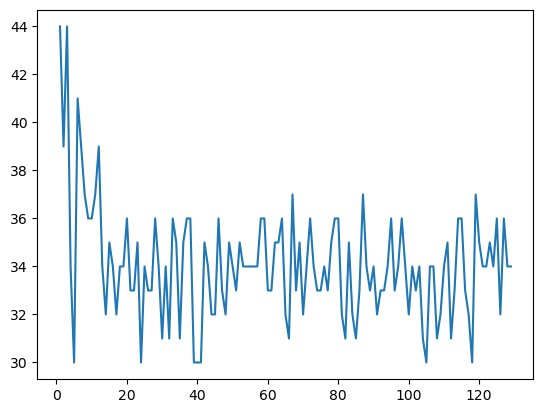

In [64]:
plt.plot(range(1,130),yanlis_secim)